In [1]:
from tensorflow.python.client import device_lib
for d in device_lib.list_local_devices():
    print(d.name, d.physical_device_desc)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


/device:CPU:0 
/device:GPU:0 device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:1b.0, compute capability: 7.0
/device:GPU:1 device: 1, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:1c.0, compute capability: 7.0
/device:GPU:2 device: 2, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:1d.0, compute capability: 7.0
/device:GPU:3 device: 3, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:1e.0, compute capability: 7.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pixiedust
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras import optimizers
import keras.backend as K
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from keras.datasets import fashion_mnist

np.set_printoptions(suppress=True)
%matplotlib inline

Pixiedust database opened successfully


Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test  = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [7]:
x_train[0].reshape(28,28)[5:9]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02352941, 0.        , 0.4       ,
        0.8       , 0.6901961 , 0.5254902 , 0.5647059 , 0.48235294,
        0.09019608, 0.        , 0.        , 0.        , 0.        ,
        0.04705882, 0.03921569, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.60784316,
        0.9254902 , 0.8117647 , 0.69803923, 0.41960785, 0.6117647 ,
        0.6313726 , 0.42745098, 0.2509804 , 0.09019608, 0.3019608 ,
        0.50980395, 0.28235295, 0.05882353],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.27058825, 0.8117647 ,
        0.8745098 , 0.8549

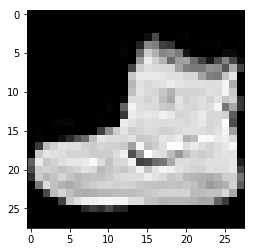

In [8]:
img = x_train[0].reshape(28,28)
plt.imshow(img, cmap=plt.get_cmap('gray'));

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [10]:
input_shape = (28, 28, 1)

In [11]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())         
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.2))                  
model.add(Dense(10, activation='softmax'))

opt = optimizers.RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
__________

In [12]:
history = model.fit(x_train, y_train, epochs=10, batch_size=16, verbose=2, validation_split=0.3, shuffle=True)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 15s - loss: 0.5310 - acc: 0.8294 - val_loss: 0.4047 - val_acc: 0.8634
Epoch 2/10
 - 13s - loss: 0.4000 - acc: 0.8691 - val_loss: 0.4110 - val_acc: 0.8673
Epoch 3/10
 - 13s - loss: 0.3514 - acc: 0.8814 - val_loss: 0.3650 - val_acc: 0.8833
Epoch 4/10
 - 13s - loss: 0.3099 - acc: 0.8910 - val_loss: 0.3155 - val_acc: 0.8927
Epoch 5/10
 - 13s - loss: 0.2845 - acc: 0.9001 - val_loss: 0.3301 - val_acc: 0.8841
Epoch 6/10
 - 13s - loss: 0.2595 - acc: 0.9088 - val_loss: 0.2757 - val_acc: 0.9084
Epoch 7/10
 - 13s - loss: 0.2395 - acc: 0.9153 - val_loss: 0.3027 - val_acc: 0.8988
Epoch 8/10
 - 13s - loss: 0.2243 - acc: 0.9205 - val_loss: 0.3174 - val_acc: 0.9057
Epoch 9/10
 - 13s - loss: 0.2068 - acc: 0.9262 - val_loss: 0.4043 - val_acc: 0.8779
Epoch 10/10
 - 13s - loss: 0.1952 - acc: 0.9306 - val_loss: 0.3317 - val_acc: 0.8897


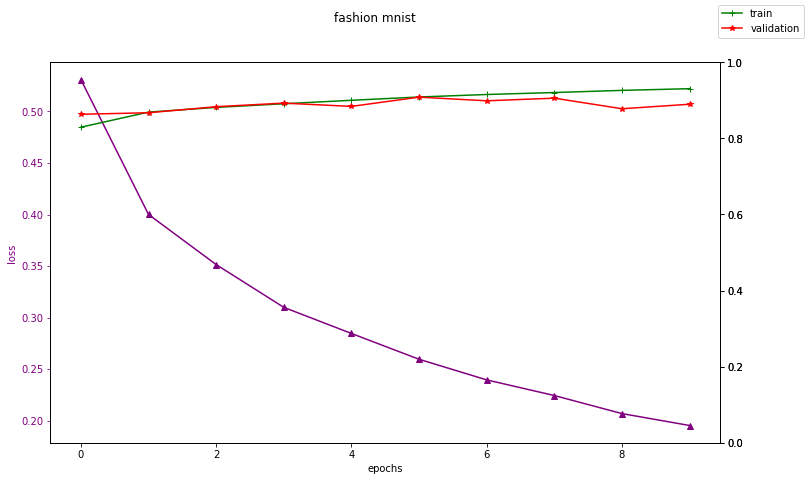

In [14]:
fig, ax1 = plt.subplots(1,1,figsize=(12,7))
ax1.plot(history.epoch, history.history['loss'], marker='^', color='purple')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss', color='purple')
ax1.tick_params('y', colors='purple')

ax2 = ax1.twinx()
plt.plot(history.epoch, history.history['acc'], marker='+', color='green', label='train')
ax2.set_ylim(0,1)

ax3 = ax1.twinx()
plt.plot(history.epoch, history.history['val_acc'], marker='*', color='red', label='validation')
ax3.set_ylim(0,1)

fig.suptitle('fashion mnist');
fig.legend();